<a href="https://colab.research.google.com/github/MAHESWARI-ROUT/spectrum-internship-drive/blob/main/Copy_of_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the below cell to download the csv and file into your colab/jupyter notebook and start working with it. You will be needing this for completing the task.

In [2]:
!wget https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv

--2023-12-09 08:50:30--  https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.02s   

2023-12-09 08:50:30 (3.80 MB/s) - ‘titanic.csv’ saved [61194/61194]



## Task: Machine Learning Model for Titanic Survival Prediction

### Introduction:
In this task, you will work on the Titanic dataset, a famous dataset in the field of machine learning. The goal is to build a machine learning model that predicts whether a passenger on the Titanic survived or not. The dataset contains various features, and you will need to perform several key tasks in the machine learning pipeline.

### Instructions:

1. **Data Preprocessing:**
    - Load the Titanic dataset.
    - Handle missing values in the dataset.
    - Encode categorical features (e.g., one-hot encoding or label encoding).
    - Split the data into training and testing sets.

2. **Exploratory Data Analysis (EDA):**
    - Perform exploratory data analysis to understand the dataset.
    - Visualize the data to gain insights into passenger demographics and their survival rates.
    - Identify any interesting patterns or correlations between features and survival.

3. **Outlier Detection and Removal:**
    - Detect and deal with outliers in the dataset.
    - Explain the approach you used for outlier detection and removal.

4. **Data Extraction:**
    - Create any new features or transformations that you believe might be useful for improving the model's performance.
    - Justify the choice of these new features or transformations.

5. **Model Selection:**
    - Choose a machine learning algorithm for classification. Suggest at least three common classification algorithms (e.g., Logistic Regression, Random Forest, Support Vector Machine).
    - Explain your rationale for selecting the chosen algorithms.

6. **Model Building and Hyperparameter Tuning:**
    - Implement the selected machine learning algorithms and train them on the training data.
    - Perform hyperparameter tuning for each algorithm to optimize their performance.
    - Clearly specify the hyperparameters you tuned and the methodology used.

7. **Model Evaluation:**
    - Evaluate the performance of each model using accuracy as the primary metric.
    - Compare the models and choose the best-performing model for the final predictions.
    - Report the accuracy score for the chosen model on the testing data.

8. **Conclusion:**
    - Summarize your findings and the key steps in the machine learning pipeline.
    - Reflect on any challenges you encountered and how you addressed them.

### Submission:
Submit your code, along with a report explaining the steps you took, the reasoning behind your choices, and the accuracy score achieved on the test dataset.

Good luck, and may your machine learning model effectively predict Titanic passenger survival!


Loading different packages

In [3]:
# your code starts here
!pip install scikit-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading required libraries and classes

In [4]:


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

1. DATA PREPROCESSING

Loading CSV file

In [5]:

df=pd.read_csv("titanic.csv")          # loading titanic dataset
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Searching for null value

In [6]:
df.isnull().sum()           # showing sum of null values of each columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handaling the null values in data set

      -In age column null values are        
       replaced by its mean
      -In embarked column  null values   
       are replaced by most frequent one

In [7]:
import statistics
Median=statistics.median(df['Age'])                                       # median of age column
df['Age'].fillna(Median,inplace=True)                                     # replacing the null values in age column by its median
df['Embarked'].fillna('most_frequent',inplace=True)                       # replacing the null values in embarked column by the most frequent one

- Unnecessary columns are dropped down from the data set
- splitting training and testing models

In [8]:
df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],inplace=True)          # dropping of passengerId,name,ticket,Cabin column
X=df.drop(columns=['Survived'])                                                  # X contains all columns other than survived
Y=df['Survived']                                                                 # Y contains survived column
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.20,random_state=96) # declaring train ,test
encoder = OneHotEncoder(sparse=False)                                               # One Hot encoding of categorical
x_train_encoded = encoder.fit_transform(x_train)                                    # encoded X_train
x_test_encoded = encoder.fit_transform(x_test)                                      # encoded X_test


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2. EXPLORATORY DATA ANALYSIS(EDA)

Visualising the data set using various plots

In [9]:
df.describe()                  # statistical analysis

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Sex', ylabel='count'>

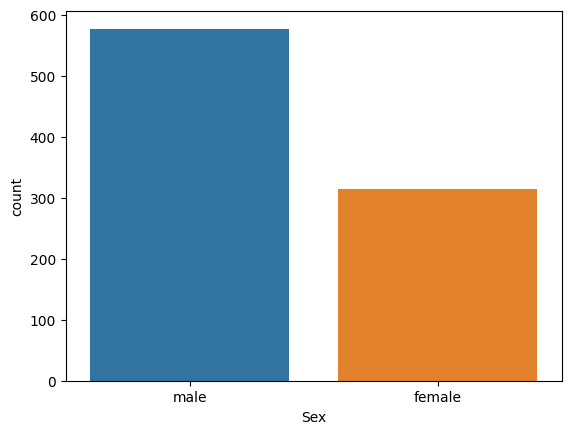

In [10]:
sns.countplot(df,x='Sex')                       # showing no of males and

<Axes: xlabel='Pclass', ylabel='count'>

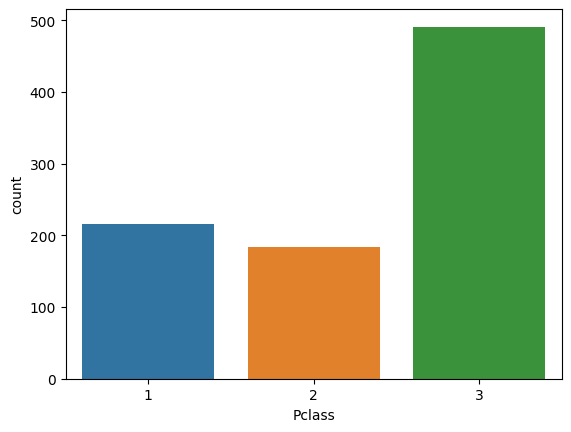

In [11]:
sns.countplot(df,x='Pclass')               # counting pclass

<Axes: xlabel='Survived', ylabel='count'>

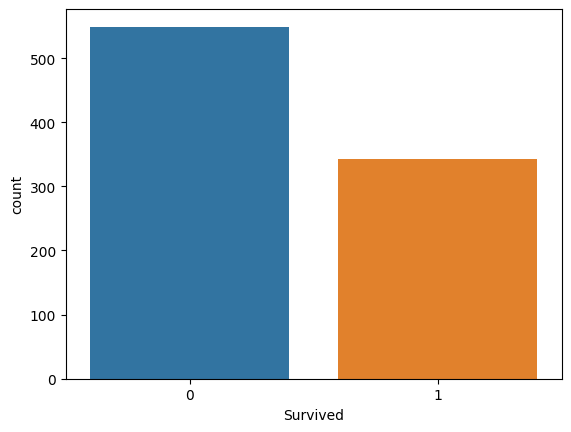

In [12]:
sns.countplot(df,x='Survived')                # showing number of survived passenger and unsurvived passangers

<Axes: xlabel='Survived', ylabel='count'>

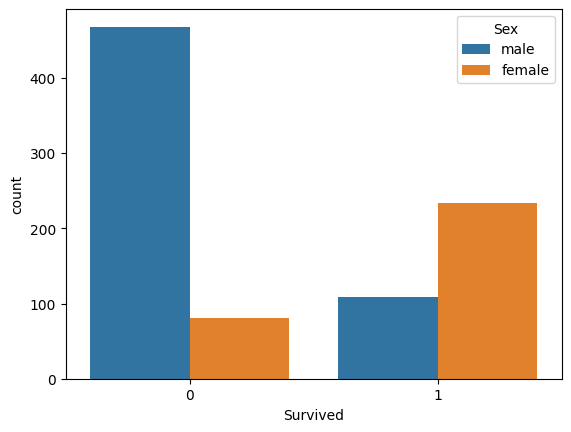

In [13]:
sns.countplot(df,x='Survived',hue='Sex')                       # counting number of survived and unsurvived passanger on basis of sex

<Axes: xlabel='Fare', ylabel='count'>

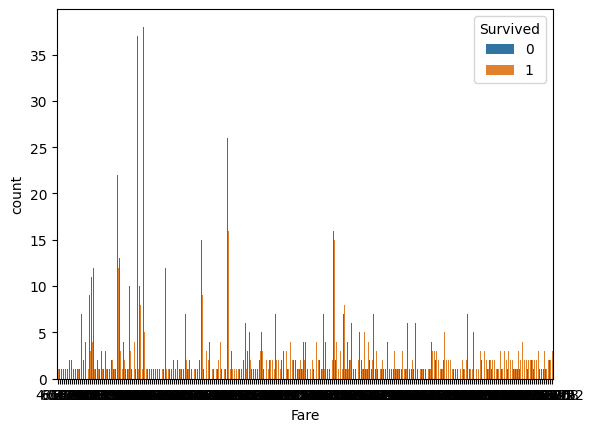

In [14]:
sns.countplot(df,x='Fare',hue='Survived')                          # ploting of fare with no of survived and unsurvived

<Axes: >

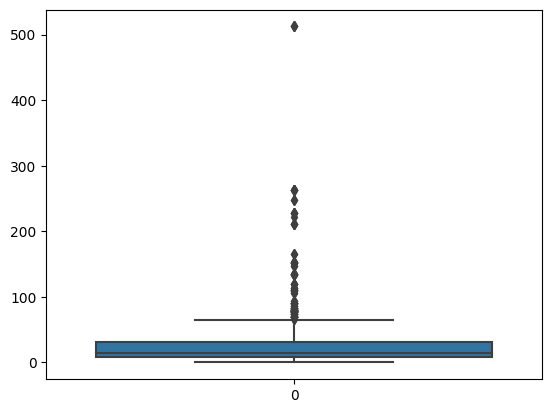

In [15]:
sns.boxplot(df['Fare'])                    # boxplot of fare to visualize outliers in it

In [16]:

Skew=df['Fare'].skew()                 # skewness of Fare column before outlier removal
Skew

4.787316519674893

In [17]:
#inter quantile range calculation
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
IQR

23.0896

In [18]:
# Lower and Upper limit declaration
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
# replacing the value of outlier greater than upperlimit with upperlimit value and the value of outlier lower than lowerlimit with lowerlimit value
df['Fare']=np.where(df['Fare']>upper_limit,upper_limit,np.where(df['Fare']<lower_limit,lower_limit,df['Fare']))

In [19]:
Skew1=df['Fare'].skew()  # skewness after outlier removal
Skew1

1.082178592000912

<Axes: >

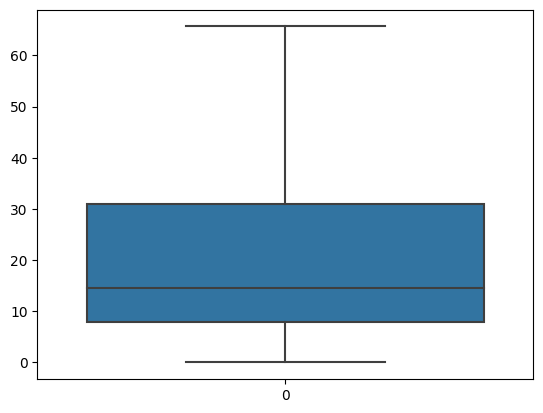

In [20]:
sns.boxplot(df['Fare'])   # visualising boxplot of fare after removal of outliers

In [21]:
Ind=df['Fare'][(df['Fare']>upper_limit)|(df['Fare']<lower_limit)].index
df.drop(Ind,inplace=True) # permanently changing the Fare column to avoid outliers

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


applying transformation to columns

In [23]:
# applying column transformation to age and embarked
trf1 = ColumnTransformer(transformers=[('impute_age', SimpleImputer(), [2]), ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6])], remainder='passthrough')
# applying column transformation to apply one hot encoding to categorical columns age and embarked
trf2 = ColumnTransformer(transformers=[('impute_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'), [1, 6])], remainder='passthrough')
# Scaling
trf3 = ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10))])
# feature selection
trf4 = SelectKBest(chi2, k=5)
#machine learning algorithm
trf5 = DecisionTreeClassifier()



creating pipeline for decission tree classifier to interconnect the cells

In [24]:
# pipeline formation
pipe=Pipeline(steps=[('trf1',trf1),
                     ('trf2',trf2),
                     ('trf3',trf3),
                     ('trf4',trf4),
                     ('trf5',trf5)])
rf=pipe.fit(x_train,y_train)
predict=rf.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


checking accuracy of pipeline of decission tree classifier generated

In [25]:
# accuracy calculation of the model using default values
print(accuracy_score(y_test,predict))

0.7094972067039106


visualizing the pipeline

In [26]:
# working of pipeline
from sklearn import set_config
set_config(display='diagram')
pipe


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7b5488b136d0>)),
                ('trf5', DecisionTreeClassifier())])

In [27]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=5, score_func=<function chi2 at 0x7b5488b136d0>),
 'trf5': DecisionTreeClassifier()}

using random forest classifier machine learning algorithm

In [28]:
from sklearn.ensemble import RandomForestClassifier         # random forest algorithm
trf6=RandomForestClassifier()


declaring pipeline for random forest classifier
predicting x_test

In [29]:
# pipeline formation for the random forest algorithm
pipe1=Pipeline(steps=[('trf1',trf1),
                     ('trf2',trf2),
                     ('trf3',trf3),
                     ('trf4',trf4),
                     ('trf6',trf6)])
rf1=pipe1.fit(x_train,y_train)
predict1=rf1.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


calculating accuracy of the model

In [30]:
print(accuracy_score(y_test,predict1))                # accuracy of the algorithm using default value


0.7094972067039106


importing machine learning algorythm to be used in the model preparation
     random forest,
     logistic regression,
     support vector class(svc)


In [31]:
# loading different machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

implimanting logistic regression in pipeline

In [32]:
trf7=LogisticRegression(tol=0.0002,intercept_scaling=1,max_iter=200)
# pipeline using LogisticRegression
pipe2=Pipeline(steps=[('trf1',trf1),
                     ('trf2',trf2),
                     ('trf3',trf3),
                     ('trf4',trf4),
                     ('trf7',trf7)])
lr=pipe2.fit(x_train,y_train)
predict_ir=lr.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


accuracy score calculation for logistic regression

In [33]:
print(accuracy_score(y_test,predict_ir))          # accuracy of logistic regression without using randomsearchcv

0.7094972067039106


implimentation of support vector class

In [34]:
# using support vector classifier
trf8=SVC(C=10,kernel='rbf')
pipe3=Pipeline(steps=[('trf1',trf1),
                     ('trf2',trf2),
                     ('trf3',trf3),
                     ('trf4',trf4),
                     ('trf8',trf8)])
svc1=pipe3.fit(x_train,y_train)
predict_svc=svc1.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


checking accuracy of svc algorithm

In [35]:
print(accuracy_score(y_test,predict_svc))   # accuracy of support vector classifier without customization

0.7094972067039106


** HYPERPARAMETER TUNING USING RANDOMIZEDSEARCHCV**
enhancing accuracy of model using randomizedsearchcv

In [36]:
# loading RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


Applying HYPERPARAMETER TUNING using *RandomizedSearchCV* to Logistic regression

**HYPERPARAMETERS TUNED in logistic regression **


*   Penalty
*   tol
*   c
*   Class_weight
*   random_state
*   solver
*   max_iter
*   n_jobs
*   verbose

In [37]:
# assinging different values to parameters of Logistic regression to enhance accuracy
penalty=[12,'elasticnet',None,'l1']
tol=[0.0001,2,0.005,-1]
C=[1.0,2.0,4.0,3.3]
class_weight=[None,12,45,23]
random_state=[None,32,42,59]
solver=['lbfgs','newton-cg','sag','liblinear']
max_iter=[100,150,-1]
n_jobs=[1,-1,4,None]
verbose=[0,1,4,2]
logistic_params={'trf7__penalty':penalty,'trf7__tol':tol,'trf7__C':C,'trf7__class_weight':class_weight,'trf7__random_state':random_state,'trf7__solver':solver,'trf7__max_iter':max_iter,'trf7__n_jobs':n_jobs,'trf7__verbose':verbose}

In [43]:
# applying RandomizedSearchCV
random_logistic=RandomizedSearchCV(pipe2,logistic_params,cv=5,scoring='accuracy')
random_logistic.fit(x_train_encoded,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('trf1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_age',
                                                                               SimpleImputer(),
                                                                               [2]),
                                                                              ('impute_embarked',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               [6])])),
                                             ('trf2',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_sex_embarked',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=Fa...
                   param_distributions={'trf7__C': [1.0, 2.0, 4.0, 3.3],
                                        'trf7__class_weight': [None, 12, 45,
                                                               23],
                                        'trf7__max_iter': [100, 150, -1],
                                        'trf7__n_jobs': [1, -1, 4, None],
                                        'trf7__penalty': [12, 'elasticnet',
                                                          None, 'l1'],
                                        'trf7__random_state': [None, 32, 42,
                                                               59],
                                        'trf7__solver': ['lbfgs', 'newton-cg',
                                                         'sag', 'liblinear'],
                                        'trf7__tol': [0.0001, 2, 0.005, -1],
                                        'trf7__verbose': [0, 1, 4, 2]},
                   scoring='accuracy')

In [44]:
# accuracy of logistic model
accuracy_logistic_model=random_logistic.best_score_
accuracy_logistic_model

0.7851570964247021

In [45]:
# checking best parameters in logistic model
random_logistic.best_params_

{'trf7__verbose': 1,
 'trf7__tol': 0.0001,
 'trf7__solver': 'newton-cg',
 'trf7__random_state': 32,
 'trf7__penalty': None,
 'trf7__n_jobs': -1,
 'trf7__max_iter': 150,
 'trf7__class_weight': None,
 'trf7__C': 2.0}

**HYPERPARAMETER TUNED in random forest**


*   n_estimator
*   max_features
*   max_depth
*   min_samples_split
*   min_samples_leaf



In [46]:
# assinging different values to parameters of Random Forest to enhance accuracy

from sklearn.model_selection import RandomizedSearchCV
n_estimators=[10,50,100,150]
max_features = ['auto','sqrt','log2']
max_depth= [None, 10, 20, 30]
min_samples_split= [2, 5, 10,18]
min_samples_leaf= [1, 2, 4,10]
random_grid={'trf6__n_estimators':n_estimators,'trf6__max_features':max_features,'trf6__max_depth':max_depth,'trf6__min_samples_split':min_samples_split,'trf6__min_samples_leaf':min_samples_leaf}


In [47]:
random_forest=RandomizedSearchCV(pipe1,random_grid,cv=5,scoring='accuracy')
random_forest.fit(x_train_encoded,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('trf1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_age',
                                                                               SimpleImputer(),
                                                                               [2]),
                                                                              ('impute_embarked',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               [6])])),
                                             ('trf2',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_sex_embarked',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=Fa...
                                                                               slice(0, 10, None))])),
                                             ('trf4',
                                              SelectKBest(k=5,
                                                          score_func=<function chi2 at 0x7b5488b136d0>)),
                                             ('trf6',
                                              RandomForestClassifier())]),
                   param_distributions={'trf6__max_depth': [None, 10, 20, 30],
                                        'trf6__max_features': ['auto', 'sqrt',
                                                               'log2'],
                                        'trf6__min_samples_leaf': [1, 2, 4, 10],
                                        'trf6__min_samples_split': [2, 5, 10,
                                                                    18],
                                        'trf6__n_estimators': [10, 50, 100,
                                                               150]},
                   scoring='accuracy')

In [48]:
#checking accuracy of Random Forest model

accuracy_randomforest_model=random_forest.best_score_
accuracy_randomforest_model

0.7808726484782823

In [49]:
# checking best parameters
random_forest.best_params_

{'trf6__n_estimators': 10,
 'trf6__min_samples_split': 18,
 'trf6__min_samples_leaf': 4,
 'trf6__max_features': 'auto',
 'trf6__max_depth': 20}

**HYPERPARAMETER TUNED in SVC **
*  C
*   kernel
*   degree
*   tol
*   cache_size
*   class_weight
*  verbose
*   max_iter
*   decision_function_shape
*   random_state



In [50]:
# assinging different values to parameters of Svc to enhance accuracy

C=[1,20,80]
kernel=['linear','poly','sigmoid','rbf']
degree=[1,2,3,5]
tol=[0.1,0.0001,-1,0.00002]
cache_size=[100,200,500]
class_weight=[None,1,12,43]
verbose=[1,2,5,False]
max_iter=[-1,170,200]
decision_function_shape=['ovo','ovr']
random_state=[32,42,100,None]
svc_params={'trf8__C':C,'trf8__kernel':kernel,'trf8__degree':degree,'trf8__tol':tol,'trf8__cache_size':cache_size,'trf8__class_weight':class_weight,'trf8__verbose':verbose,'trf8__max_iter':max_iter,'trf8__decision_function_shape':decision_function_shape,'trf8__random_state':random_state}

In [51]:
random_svc=RandomizedSearchCV(pipe3,svc_params,cv=5,scoring='accuracy')
random_svc.fit(x_train_encoded,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=170).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=170).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist

[LibSVM][LibSVM][LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=170).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default

[LibSVM]

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('trf1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_age',
                                                                               SimpleImputer(),
                                                                               [2]),
                                                                              ('impute_embarked',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               [6])])),
                                             ('trf2',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_sex_embarked',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=Fa...
                   param_distributions={'trf8__C': [1, 20, 80],
                                        'trf8__cache_size': [100, 200, 500],
                                        'trf8__class_weight': [None, 1, 12, 43],
                                        'trf8__decision_function_shape': ['ovo',
                                                                          'ovr'],
                                        'trf8__degree': [1, 2, 3, 5],
                                        'trf8__kernel': ['linear', 'poly',
                                                         'sigmoid', 'rbf'],
                                        'trf8__max_iter': [-1, 170, 200],
                                        'trf8__random_state': [32, 42, 100,
                                                               None],
                                        'trf8__tol': [0.1, 0.0001, -1, 2e-05],
                                        'trf8__verbose': [1, 2, 5, False]},
                   scoring='accuracy')

In [54]:
#checking accuracy of Svc model
accuracy_svc_model=random_svc.best_score_
accuracy_svc_model

0.7851570964247021

In [55]:
# checking best parameters
random_svc.best_params_

{'trf8__verbose': 5,
 'trf8__tol': 2e-05,
 'trf8__random_state': None,
 'trf8__max_iter': -1,
 'trf8__kernel': 'poly',
 'trf8__degree': 1,
 'trf8__decision_function_shape': 'ovr',
 'trf8__class_weight': None,
 'trf8__cache_size': 200,
 'trf8__C': 20}

**HYPERPARAMETER TUNING in decission tree classifier**
*   criterion
*   splitter
*   max_depth
*   min_sample_split
*  min_sample_leaf
*   min_weight_fraction_leaf
*   max_features
*  random_states



In [56]:
# assinging different values to parameters of Decission tree classifier to enhance accuracy

criterion=['gini','entropy']
splitter=['best','random']
max_depth=[None,20,30,40]
min_samples_split=[24,1,12]
min_samples_leaf=[1,6,3]
min_weight_fraction_leaf=[0.0,0.001,0.25]
max_features=['auto','sqrt',5,0.3]
random_state=[32,42,None]
tree_params={'trf5__criterion':criterion,'trf5__splitter':splitter,'trf5__max_depth':max_depth,'trf5__min_samples_split':min_samples_split,'trf5__min_samples_leaf':min_samples_leaf,'trf5__min_weight_fraction_leaf':min_weight_fraction_leaf,'trf5__max_features':max_features,'trf5__random_state':random_state}


In [57]:

random_tree=RandomizedSearchCV(pipe,tree_params,cv=5,scoring='accuracy')
random_tree.fit(x_train_encoded,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featu

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('trf1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_age',
                                                                               SimpleImputer(),
                                                                               [2]),
                                                                              ('impute_embarked',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               [6])])),
                                             ('trf2',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_sex_embarked',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=Fa...
                                              DecisionTreeClassifier())]),
                   param_distributions={'trf5__criterion': ['gini', 'entropy'],
                                        'trf5__max_depth': [None, 20, 30, 40],
                                        'trf5__max_features': ['auto', 'sqrt',
                                                               5, 0.3],
                                        'trf5__min_samples_leaf': [1, 6, 3],
                                        'trf5__min_samples_split': [24, 1, 12],
                                        'trf5__min_weight_fraction_leaf': [0.0,
                                                                           0.001,
                                                                           0.25],
                                        'trf5__random_state': [32, 42, None],
                                        'trf5__splitter': ['best', 'random']},
                   scoring='accuracy')

In [58]:
# accuracy of decission tree classifier
accuracy_decissiontree_model=random_tree.best_score_
accuracy_decissiontree_model

0.7851570964247021

In [59]:
# checking best parameters
random_tree.best_params_


{'trf5__splitter': 'best',
 'trf5__random_state': None,
 'trf5__min_weight_fraction_leaf': 0.25,
 'trf5__min_samples_split': 24,
 'trf5__min_samples_leaf': 1,
 'trf5__max_features': 'sqrt',
 'trf5__max_depth': 40,
 'trf5__criterion': 'gini'}

*printing accuracy of all the model used*

In [61]:
# comparing accuracy of different model
print("Accuracy of LogisticRegression algorithm",accuracy_logistic_model)
print("Accuracy of Random Forest algorithm",accuracy_randomforest_model)
print("Acurracy of Support Vector Class algorithm",accuracy_svc_model)
print("Accuracy of Decission Tree Classifier algorithm",accuracy_decissiontree_model)

Accuracy of LogisticRegression algorithm 0.7851570964247021
Accuracy of Random Forest algorithm 0.7808726484782823
Acurracy of Support Vector Class algorithm 0.7851570964247021
Accuracy of Decission Tree Classifier algorithm 0.7851570964247021


Selection of best model

***SELECTING BEST MODEL WITH HIGHEST ACCURACY***

In [62]:
# Define the accuracy scores for different models
accuracy_scores = {
    "Logistic Regression": accuracy_logistic_model,
    "Random Forest": accuracy_randomforest_model,
    "Support Vector Classifier": accuracy_svc_model,
   "Decision Tree Classifier": accuracy_decissiontree_model,
}

# Find the model with the highest accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

# Printing the best model and its accuracy
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)


Best Model: Logistic Regression
Best Accuracy: 0.7851570964247021


                                ** SELECTION REPMODELORT**
*PROBLEM STATEMENT*


 ▶ to select best machine learning model for titanic dataset using the stepts mentioned(using onehotencoding,feature selection,hyperparameter tuning)



 *DATA*
   Given titanic data set contains both categorical and numerical values and many values are missing . so the data is preprocessed before using


 *METHODOLOGY USED*

    *   data loading
    *   data spliting:- spliting data into train and test
    *   model selection:-LOGISTIC REGRESSION,RANDOM FOREST,SUPPORT VECTOR  
        CLASS, DECESSION TREE etc are selected for model preparation
    *   HYPERPARAMETER TUNING:- using randomsearchcv as it enhances accuracy by
        taking random combination of parameters
    *   Model Evaluation:- based on accuracy best model was chosen



 *RESULT*
     based on model selection process the best model for this data set is
     **LOGISTIC REGRESSION** with the following parameters


          *   verbose=0
          *   tol=0.005
          *   solver=netwon-cg
          *   random_state=32
          *   penalty=none
          *   n_jobs=1
          *   max_iter=100
          *   class_weight=none
          *   C=3.3
 *Challenges*
         

          *   DATA PREPROCESSING USING ONEHOTENCODING,FEATURE SELECTION,SIMPLE IMPUTER etc.
          *   HYPERPARAMETER TUNING:selection best combination by manually changing the parameters
          *   MODEL SELECTION exploring model and choosing the best was was a tough part
          
*CONCLUSION*
      Model selection was the most important part in machine learning.By evaluating different models and hyper parameter the best model was found to br LOGISTIC REGRESSION which will predict survival rate with high accuracy.





